In [1]:
# Dependencies
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import plotly.graph_objects as go
import datetime as DT
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# API Calls

## Covid Tracking
https://covidtracking.com/api

The following fields are deprecated and are no longer being updated with new data.

/api/v1/states/current.json:
- positiveScore
- negativeScore
- negativeRegularScore
- commercialScore
- score
- grade - Use dataQualityGrade instead
- total

/api/v1/us/current.json
- posNeg
- total

In [2]:
url = "https://covidtracking.com/api/v1"

# Current state data - /api/v1/states/current 
region = "states"
time = "current"
state_current = requests.get(f"{url}/{region}/{time}.json").json()

# Historic state data - /api/v1/states/daily 
region = "states"
time = "daily"
state_daily = requests.get(f"{url}/{region}/{time}.json").json()

# Current US data - /api/v1/us/current
region = "us"
time = "current"
us_current = requests.get(f"{url}/{region}/{time}.json").json()

# Historic US data - /api/v1/us/daily
region = "us"
time = "daily"

us_daily = requests.get(f"{url}/{region}/{time}.json").json()

## Census Popoulation

https://api.census.gov/data/2019/pep/population.html

https://www.census.gov/data/developers/data-sets/popest-popproj/popest.Vintage_2019.html

In [3]:
pop_url = "https://api.census.gov/data/2019/pep/population?get=STATE,POP,NAME&for=state:*"
pop_state = requests.get(f"{pop_url}").json()

## API Calls into Dataframes

In [4]:
pop_df = pd.DataFrame(pop_state, columns = pop_state[0]) 
pop_df = pop_df.drop(pop_df.index[0])
pop_df.head()

,STATE,POP,NAME,state
1,28,2976149,Mississippi,28
2,29,6137428,Missouri,29
3,30,1068778,Montana,30
4,31,1934408,Nebraska,31
5,32,3080156,Nevada,32


In [5]:
state_daily_df = pd.DataFrame(state_daily)
state_daily_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200519,AK,399.0,35981.0,NaN,16.0,NaN,NaN,NaN,NaN,...,NaN,36380,36380,36380,02,0.0,0.0,769.0,0.0,769.0
1,20200519,AL,12376.0,145190.0,NaN,NaN,1453.0,NaN,517.0,NaN,...,1453.0,157566,157566,157566,01,15.0,37.0,153.0,290.0,443.0
2,20200519,AR,4923.0,88778.0,NaN,78.0,535.0,NaN,NaN,14.0,...,535.0,93701,93701,93701,05,2.0,5.0,8352.0,110.0,8462.0
3,20200519,AS,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,124,124,124,60,0.0,0.0,19.0,0.0,19.0
4,20200519,AZ,14566.0,147005.0,NaN,792.0,1746.0,318.0,NaN,201.0,...,1746.0,161571,161571,161571,04,18.0,29.0,4702.0,396.0,5098.0


In [6]:
state_current_df = pd.DataFrame(state_current)
state_current_df.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,notes,dataQualityGrade,...,checkTimeEt,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,hash
0,AK,399,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 15:30,10,NaN,36380,36380,36380,02,2020-05-19T04:00:00Z,2020-05-19T19:30:00Z,5acf43149fc3152a86fcbf5b88676bca05ebb477
1,AL,12376,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 15:38,504,1453.0,157566,157566,157566,01,2020-05-18T04:00:00Z,2020-05-19T19:38:00Z,a9f818a90c2d692fb9046e2b0c0b3a05142746d4
2,AR,4923,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A,...,5/19 17:52,102,535.0,93701,93701,93701,05,2020-05-19T04:00:00Z,2020-05-19T21:52:00Z,34dd9ef35ebf02a037633ceb414e739a68b38e14
3,AZ,14566,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",A+,...,5/19 14:16,704,1746.0,161571,161571,161571,04,2020-05-19T04:00:00Z,2020-05-19T18:16:00Z,b3dc6933db82188e13c7a386daa03fd7a8082ba4
4,CA,81795,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 14:18,3334,NaN,1339316,1339316,1339316,06,2020-05-19T04:00:00Z,2020-05-19T18:18:00Z,04a22035801e51eae2be36696d81972961f36629


# Data Merging

In [7]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [8]:
state_daily_df['state_name']=state_daily_df['state'].map(states_dict)

# check if any values did not map
# state_daily_df[state_daily_df['state_name'].isnull()]

state_daily_merged_df = pd.merge (state_daily_df, pop_df, how = "outer", left_on = ["state_name"], right_on = ["NAME"] )

# check if any items did not merge.
# current API call for population is lacking data from American Samoa, Guam, Northern Mariana Islands, Virgin Islands.
# state_daily_df_merged[state_daily_df_merged['NAME'].isnull()]['state_name'].unique()

# Keep the correctly merged items.
state_daily_merged_df = state_daily_merged_df[state_daily_merged_df['NAME'].isnull() == False]

state_daily_merged_df = state_daily_merged_df.rename(columns = {"state_x": "state",
                                      "POP": "2019 population"})
state_daily_merged_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,STATE,2019 population,NAME,state_y
0,20200519,AK,399.0,35981.0,NaN,16.0,NaN,NaN,NaN,NaN,...,0.0,0.0,769.0,0.0,769.0,Alaska,02,731545,Alaska,02
1,20200518,AK,399.0,35212.0,NaN,9.0,NaN,NaN,NaN,NaN,...,0.0,0.0,957.0,3.0,960.0,Alaska,02,731545,Alaska,02
2,20200517,AK,396.0,34255.0,NaN,13.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1366.0,4.0,1370.0,Alaska,02,731545,Alaska,02
3,20200516,AK,392.0,32889.0,NaN,10.0,NaN,NaN,NaN,NaN,...,0.0,0.0,859.0,4.0,863.0,Alaska,02,731545,Alaska,02
4,20200515,AK,388.0,32030.0,NaN,8.0,NaN,NaN,NaN,NaN,...,0.0,0.0,655.0,1.0,656.0,Alaska,02,731545,Alaska,02


In [9]:
state_current_df['state_name']=state_current_df['state'].map(states_dict)

# check if any values did not map
# state_daily_df[state_daily_df['state_name'].isnull()]

state_current_merged_df = pd.merge (state_current_df, pop_df, how = "outer", left_on = ["state_name"], right_on = ["NAME"] )

# check if any items did not merge.
# current API call for population is lacking data from American Samoa, Guam, Northern Mariana Islands, Virgin Islands.
# state_current_df_merged[state_current_df_merged['NAME'].isnull()]['state_name'].unique()

# Keep the correctly merged items.
state_current_merged_df = state_current_merged_df[state_current_merged_df['NAME'].isnull() == False]

state_current_merged_df = state_current_merged_df.rename(columns = {"state_x": "state",
                                      "POP": "2019 population"})
state_current_merged_df.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,notes,dataQualityGrade,...,posNeg,fips,dateModified,dateChecked,hash,state_name,STATE,2019 population,NAME,state_y
0,AK,399,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",B,...,36380,02,2020-05-19T04:00:00Z,2020-05-19T19:30:00Z,5acf43149fc3152a86fcbf5b88676bca05ebb477,Alaska,02,731545,Alaska,02
1,AL,12376,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,157566,01,2020-05-18T04:00:00Z,2020-05-19T19:38:00Z,a9f818a90c2d692fb9046e2b0c0b3a05142746d4,Alabama,01,4903185,Alabama,01
2,AR,4923,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A,...,93701,05,2020-05-19T04:00:00Z,2020-05-19T21:52:00Z,34dd9ef35ebf02a037633ceb414e739a68b38e14,Arkansas,05,3017804,Arkansas,05
3,AZ,14566,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",A+,...,161571,04,2020-05-19T04:00:00Z,2020-05-19T18:16:00Z,b3dc6933db82188e13c7a386daa03fd7a8082ba4,Arizona,04,7278717,Arizona,04
4,CA,81795,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,1339316,06,2020-05-19T04:00:00Z,2020-05-19T18:18:00Z,04a22035801e51eae2be36696d81972961f36629,California,06,39512223,California,06


# Select Columns

In [10]:
state_daily_merged_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease', 'state_name', 'STATE',
       '2019 population', 'NAME', 'state_y'],
      dtype='object')

In [11]:
select_columns_daily = ['date', 'state', 'positive', 'totalTestResults', "2019 population", "positiveIncrease", "totalTestResultsIncrease"]
state_daily_analysis_df_pre = state_daily_merged_df[select_columns_daily]
state_daily_analysis_df_pre.columns = map(str.lower, state_daily_analysis_df_pre.columns)
state_daily_analysis_df_pre.head()

,date,state,positive,totaltestresults,2019 population,positiveincrease,totaltestresultsincrease
0,20200519,AK,399.0,36380,731545,0.0,769.0
1,20200518,AK,399.0,35611,731545,3.0,960.0
2,20200517,AK,396.0,34651,731545,4.0,1370.0
3,20200516,AK,392.0,33281,731545,4.0,863.0
4,20200515,AK,388.0,32418,731545,1.0,656.0


In [12]:
state_current_merged_df.columns

Index(['state', 'positive', 'positiveScore', 'negativeScore',
       'negativeRegularScore', 'commercialScore', 'grade', 'score', 'notes',
       'dataQualityGrade', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'checkTimeEt', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'dateModified', 'dateChecked',
       'hash', 'state_name', 'STATE', '2019 population', 'NAME', 'state_y'],
      dtype='object')

In [13]:
select_columns_current = ['state', 'positive', 'totalTestResults', "2019 population"]
state_current_analysis_df_pre = state_current_merged_df[select_columns_current]
state_current_analysis_df_pre.columns = map(str.lower, state_current_analysis_df_pre.columns)
state_current_analysis_df_pre.head()

,state,positive,totaltestresults,2019 population
0,AK,399,36380,731545
1,AL,12376,157566,4903185
2,AR,4923,93701,3017804
3,AZ,14566,161571,7278717
4,CA,81795,1339316,39512223


# Data Cleaning

In [14]:
# checking for null date values
# state_daily_analysis[state_daily_analysis['date'].isnull()]
state_daily_date = state_daily_analysis_df_pre.copy()
state_daily_date['year'] = state_daily_date['date'].astype('str').str[:4]
state_daily_date['month'] = state_daily_date['date'].astype('str').str[4:6]
state_daily_date['day'] = state_daily_date['date'].astype('str').str[6:]
state_daily_date ['date'] = state_daily_date['month']+"-"+state_daily_date['day']+"-"+state_daily_date['year']
state_daily_date ['full_date'] = pd.to_datetime(state_daily_date['date'], format='%m-%d-%Y')
state_daily_date ['full_date'] = state_daily_date ['full_date'].dt.strftime("%m-%d-%Y")
state_daily_date
select_columns = ['full_date', 'state','positive', 'totaltestresults', '2019 population', 'positiveincrease', 'totaltestresultsincrease']
state_daily_analysis_df = state_daily_date[select_columns]
state_daily_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,positiveincrease,totaltestresultsincrease
0,05-19-2020,AK,399.0,36380,731545,0.0,769.0
1,05-18-2020,AK,399.0,35611,731545,3.0,960.0
2,05-17-2020,AK,396.0,34651,731545,4.0,1370.0
3,05-16-2020,AK,392.0,33281,731545,4.0,863.0
4,05-15-2020,AK,388.0,32418,731545,1.0,656.0


In [15]:
state_current_date = state_current_analysis_df_pre.copy()
state_current_date['full_date'] = pd.to_datetime('today').strftime("%m-%d-%Y")

select_columns = ['full_date', 'state','positive', 'totaltestresults', '2019 population']
state_current_analysis_df = state_current_date[select_columns]
state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population
0,05-19-2020,AK,399,36380,731545
1,05-19-2020,AL,12376,157566,4903185
2,05-19-2020,AR,4923,93701,3017804
3,05-19-2020,AZ,14566,161571,7278717
4,05-19-2020,CA,81795,1339316,39512223


# Creating Calculated Columns (daily and current)

In [16]:
state_daily_analysis_df ['tests per 1000'] =  state_daily_analysis_df['totaltestresults'].astype(int)/state_daily_analysis_df['2019 population'].astype(int)*1000

state_daily_analysis_df.head()

state_current_analysis_df ['tests per 1000'] =  state_current_analysis_df['totaltestresults'].astype(int)/state_current_analysis_df['2019 population'].astype(int)*1000

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000
0,05-19-2020,AK,399,36380,731545,49.730365
1,05-19-2020,AL,12376,157566,4903185,32.135438
2,05-19-2020,AR,4923,93701,3017804,31.049399
3,05-19-2020,AZ,14566,161571,7278717,22.197731
4,05-19-2020,CA,81795,1339316,39512223,33.896245


In [17]:
state_daily_analysis_df ['positives per 1000'] =  state_daily_analysis_df['positive'].astype(int)/state_daily_analysis_df['2019 population'].astype(int)*1000

state_daily_analysis_df.head()

state_current_analysis_df ['positives per 1000'] =  state_current_analysis_df['positive'].astype(int)/state_current_analysis_df['2019 population'].astype(int)*1000

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000
0,05-19-2020,AK,399,36380,731545,49.730365,0.545421
1,05-19-2020,AL,12376,157566,4903185,32.135438,2.524074
2,05-19-2020,AR,4923,93701,3017804,31.049399,1.631319
3,05-19-2020,AZ,14566,161571,7278717,22.197731,2.001177
4,05-19-2020,CA,81795,1339316,39512223,33.896245,2.070119


In [18]:
state_daily_analysis_df['positives%'] = state_daily_analysis_df['positive'].astype(int)/state_daily_analysis_df['totaltestresults'].astype(int)

state_daily_analysis_df.head()

state_current_analysis_df['positives%'] = state_current_analysis_df['positive'].astype(int)/state_current_analysis_df['totaltestresults'].astype(int)

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000,positives%
0,05-19-2020,AK,399,36380,731545,49.730365,0.545421,0.010968
1,05-19-2020,AL,12376,157566,4903185,32.135438,2.524074,0.078545
2,05-19-2020,AR,4923,93701,3017804,31.049399,1.631319,0.052539
3,05-19-2020,AZ,14566,161571,7278717,22.197731,2.001177,0.090152
4,05-19-2020,CA,81795,1339316,39512223,33.896245,2.070119,0.061072


# Creating Calculated Columns (for weekly positive)

In [19]:
state_positive_analysis_df = state_daily_analysis_df.copy()
state_positive_analysis_df['full_date'] = pd.to_datetime(state_positive_analysis_df['full_date'])

state_positive_analysis_df['week_start'] = state_positive_analysis_df['full_date'] - state_positive_analysis_df['full_date'].dt.weekday*np.timedelta64(1,'D')

weekly_pos = state_positive_analysis_df.groupby(['state', 'week_start'])['positiveincrease'].sum().reset_index()
weekly_total = state_positive_analysis_df.groupby(['state', 'week_start'])['totaltestresultsincrease'].sum().reset_index()

weekly_pos_total_df = pd.merge (weekly_pos, weekly_total, how = "left", left_on = ["state", "week_start"], right_on = ["state", "week_start"] ).set_index('state')

weekly_pos_total_df['positives%'] = weekly_pos_total_df['positiveincrease'].astype(int)/weekly_pos_total_df['totaltestresultsincrease'].astype(int)

weekly_pos_total_df['week_ends'] = weekly_pos_total_df['week_start'] + DT.timedelta(days=6)

weekly_pos_total_df

,week_start,positiveincrease,totaltestresultsincrease,positives%,week_ends
state,,,,,
AK,2020-03-02,0.0,6.0,0.000000,2020-03-08
AK,2020-03-09,1.0,130.0,0.007692,2020-03-15
AK,2020-03-16,21.0,824.0,0.025485,2020-03-22
AK,2020-03-23,80.0,2366.0,0.033812,2020-03-29
AK,2020-03-30,83.0,2950.0,0.028136,2020-04-05
...,...,...,...,...,...
WY,2020-04-20,53.0,878.0,0.060364,2020-04-26
WY,2020-04-27,217.0,2060.0,0.105340,2020-05-03
WY,2020-05-04,82.0,1845.0,0.044444,2020-05-10


# Creating HeatMap for Tests per Capita

In [20]:
# calculating last 10 weeks Option 1
today = pd.to_datetime('today')
# option 2 - week ends (sundays)
today = today - DT.timedelta(today.weekday()+1)

last_ten_weeks = []

for i in range (10):
    delta = 7*(i)
    delta_date = today - DT.timedelta(days=delta)
        
    last_ten_weeks.append(delta_date.date().strftime("%m-%d-%Y"))
#     last_ten_weeks.append(delta_date.date())
#
    print (delta_date)
last_ten_weeks

2020-05-17 17:56:48.945402
2020-05-10 17:56:48.945402
2020-05-03 17:56:48.945402
2020-04-26 17:56:48.945402
2020-04-19 17:56:48.945402
2020-04-12 17:56:48.945402
2020-04-05 17:56:48.945402
2020-03-29 17:56:48.945402
2020-03-22 17:56:48.945402
2020-03-15 17:56:48.945402


['05-17-2020',
 '05-10-2020',
 '05-03-2020',
 '04-26-2020',
 '04-19-2020',
 '04-12-2020',
 '04-05-2020',
 '03-29-2020',
 '03-22-2020',
 '03-15-2020']

In [21]:
# Creating Pivot Tables

# "avg works because there isn't more than one value per crosssection"
state_daily_test_pivot=state_daily_analysis_df.pivot_table(index=['state'], values = 'tests per 1000', columns = "full_date", aggfunc = 'mean')

today = last_ten_weeks[0]

state_daily_test_pivot_final = state_daily_test_pivot[last_ten_weeks]
state_daily_test_pivot_final = state_daily_test_pivot_final.iloc[:, ::-1]
state_daily_test_pivot_final.columns = state_daily_test_pivot_final.columns.astype(str)
# pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('precision', 1)
state_daily_test_pivot_final= state_daily_test_pivot_final.sort_values(by = [today], ascending = False)
state_daily_test_pivot_final

full_date,03-15-2020,03-22-2020,03-29-2020,04-05-2020,04-12-2020,04-19-2020,04-26-2020,05-03-2020,05-10-2020,05-17-2020
state,,,,,,,,,,
RI,0.274694,0.958125,2.958387,6.778615,19.209693,32.800905,50.410578,67.896590,86.101905,106.243292
NY,0.271004,3.156286,8.860075,15.538543,23.728355,31.745088,41.398590,50.680233,60.811386,72.654873
ND,0.125974,1.690151,4.531127,8.906100,13.581572,17.885684,27.185452,43.766780,58.878411,72.462608
MA,0.094015,0.873848,5.671379,10.441345,16.952332,24.536079,34.254610,45.650470,56.349486,66.859021
NM,0.236071,2.279156,5.248878,8.025452,13.683519,17.470190,25.626792,35.741589,46.285606,61.323074
LA,0.052917,0.752453,5.995318,12.976484,22.381073,29.114648,30.768410,37.893699,46.436129,57.040600
NJ,0.024543,0.252303,4.008246,9.250647,14.268441,19.216882,25.122633,30.968263,35.176798,54.892431
UT,0.049595,1.150670,4.364686,9.635809,13.797436,19.824028,29.851296,38.085964,45.699289,53.260835
DC,0.134609,1.494866,3.983002,9.683329,15.076181,19.410584,25.601170,32.734017,41.898749,51.754944


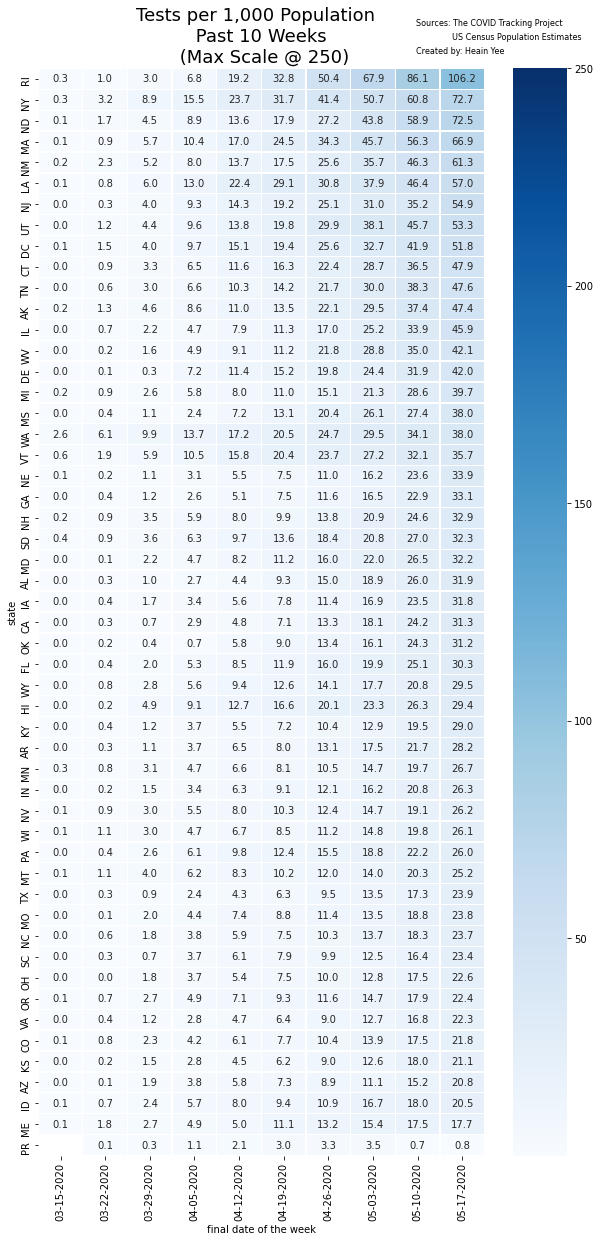

In [22]:
max_scale_tests = 250

fig, ax = plt.subplots(figsize=(10,20))
title = "Tests per 1,000 Population  \n Past 10 Weeks \n (Max Scale @ 250)"

plt.title(title, fontsize=18)

sns.heatmap(state_daily_test_pivot_final, cmap = 'Blues', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax, vmax = max_scale_tests)

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

textstr = "US Census Population Estimates"
plt.gcf().text(.70, .90, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/HM_testsper1000")

plt.show()

# Creating HeatMap for Positive Tests

In [23]:
weekly_pos_total_pivot=weekly_pos_total_df.pivot_table(index=['state'], values = 'positives%', columns = "week_ends", aggfunc = 'mean')
weekly_pos_total_pivot

week_ends,2020-02-09,2020-03-01,2020-03-08,2020-03-15,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24
state,,,,,,,,,,,,,,
AK,NaN,NaN,0.000000,0.007692,0.025485,0.033812,0.028136,0.049601,0.025310,0.003502,0.004999,0.001901,0.002333,0.001735
AL,NaN,NaN,NaN,0.300000,0.080666,0.197166,0.122404,0.203292,0.054374,0.051475,0.076785,0.058761,0.068927,0.497533
AR,NaN,NaN,NaN,0.141593,0.196830,0.101281,0.051868,0.053066,0.111656,0.076016,0.036510,0.025004,0.051483,0.019258
AZ,NaN,NaN,0.150000,0.083333,0.465116,0.057077,0.099719,0.086400,0.127746,0.135099,0.129630,0.084729,0.068094,0.064118
CA,NaN,NaN,1.000000,0.311077,0.106870,0.310949,0.085626,0.113233,0.094279,0.048254,0.060380,0.054453,0.043490,0.028403
CO,NaN,NaN,0.086022,0.190402,0.090717,0.181756,0.235693,0.212157,0.260968,0.232796,0.161919,0.152145,0.090545,0.098358
CT,NaN,NaN,0.033333,0.165217,0.068697,0.201136,0.323835,0.354318,0.324545,0.357394,0.177145,0.154049,0.095633,0.067793
DC,NaN,NaN,0.200000,0.178571,0.085417,0.138952,0.163062,0.230426,0.300098,0.239872,0.233413,0.194187,0.122340,0.109199
DE,NaN,NaN,NaN,0.187500,1.000000,1.000000,0.065566,0.196155,0.286914,0.335802,0.261586,0.169680,0.124466,0.112335


In [24]:
weekly_pos_total_pivot_final = weekly_pos_total_pivot[weekly_pos_total_pivot.columns[-11:-1]]
weekly_pos_total_pivot_final.columns = weekly_pos_total_pivot_final.columns.astype(str)
merge_rank = state_daily_test_pivot_final.reset_index()['state']
weekly_pos_total_pivot_final = pd.merge (merge_rank, weekly_pos_total_pivot_final, how = "left", left_on = ["state"], right_on = ["state"] ).set_index('state')
weekly_pos_total_pivot_final

,2020-03-15,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,2020-05-17
state,,,,,,,,,,
RI,0.065891,0.087017,0.099575,0.155177,0.132356,0.145159,0.143876,0.110019,0.093176,0.065614
NY,0.122956,0.257247,0.399652,0.481204,0.418419,0.346846,0.241002,0.157121,0.096303,0.063915
ND,0.010417,0.022651,0.032333,0.032693,0.028347,0.084451,0.039791,0.025641,0.026051,0.039509
MA,0.087500,0.089860,0.130311,0.229522,0.289213,0.276233,0.225692,0.167405,0.131619,0.113437
NM,0.029083,0.010271,0.028906,0.052559,0.053186,0.078589,0.050401,0.050545,0.047311,0.034220
LA,0.373444,0.229705,0.110901,0.291798,0.173490,0.106475,0.370057,0.077497,0.056910,0.057447
NJ,0.508287,0.897677,0.343875,0.517975,0.546232,0.533547,0.452513,0.341012,0.315347,0.044553
UT,0.170886,0.043343,0.052213,0.052429,0.052316,0.039646,0.032787,0.039848,0.044084,0.040714
DC,0.178571,0.085417,0.138952,0.163062,0.230426,0.300098,0.239872,0.233413,0.194187,0.122340


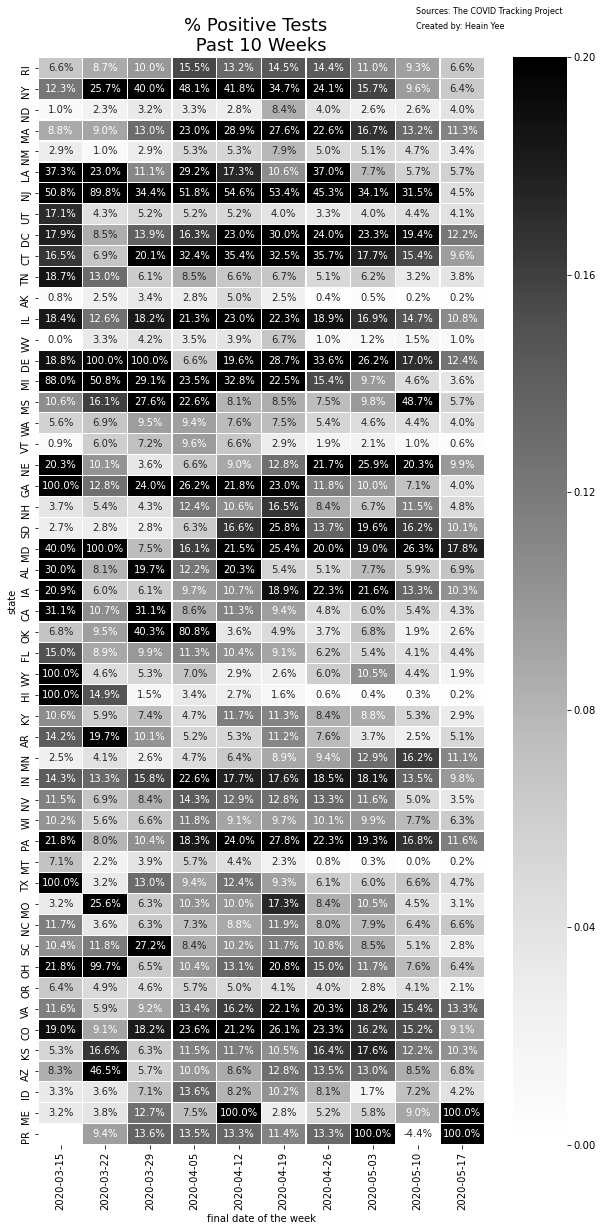

In [25]:
max_scale_positives = .2

fig, ax = plt.subplots(figsize=(10,20))
title = "% Positive Tests  \n Past 10 Weeks "

plt.title(title, fontsize=18)

sns.heatmap(weekly_pos_total_pivot_final, cmap = 'Greys', linewidths = 0.30, annot =True, fmt = '.1%', ax=ax, vmax = max_scale_positives, vmin = 0,)

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.65, .90, textstr, fontsize=8)

plt.savefig("images/HM_positive%")

plt.show()

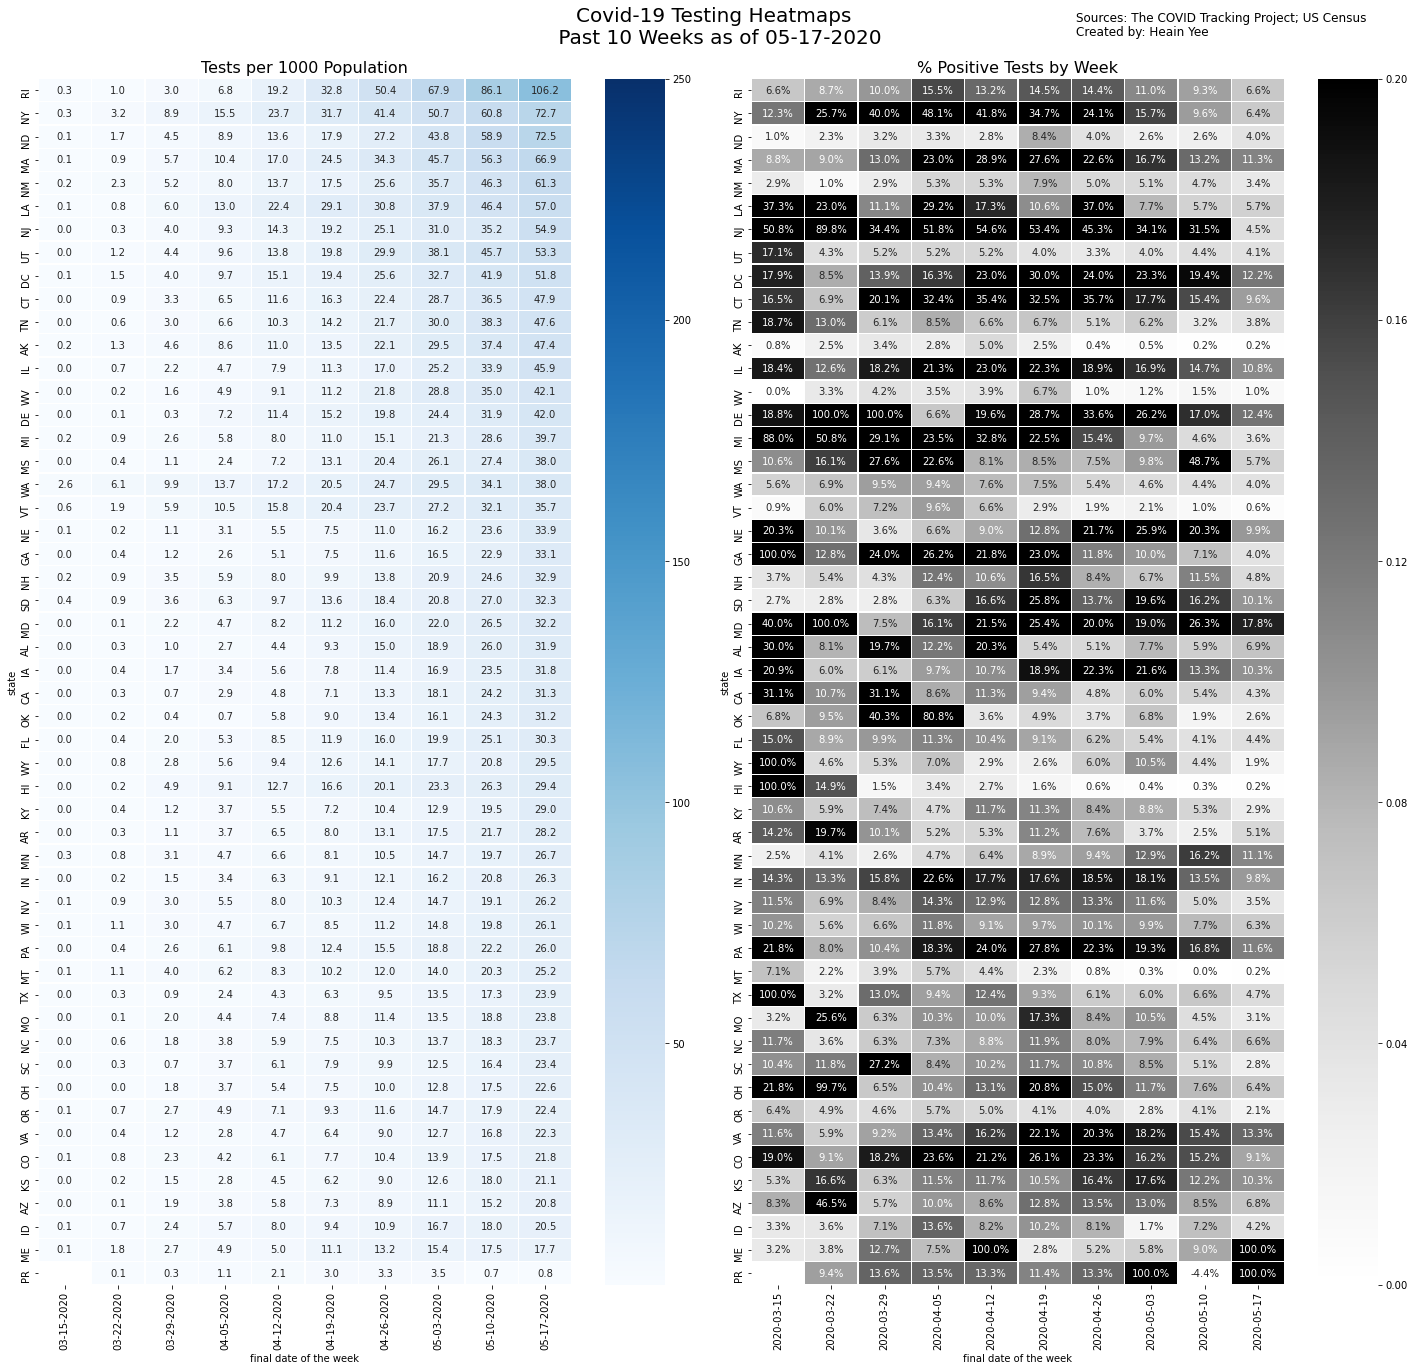

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
title = f"Covid-19 Testing Heatmaps \n Past 10 Weeks as of {today}"
fig.suptitle(title, fontsize=20)

ax1.set_title("Tests per 1000 Population", fontsize=16)
sns.heatmap(state_daily_test_pivot_final, cmap = 'Blues', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax1, vmax = max_scale_tests, cbar="False")

ax1.set_xlabel ("final date of the week")

ax2.set_title("% Positive Tests by Week", fontsize=16)
sns.heatmap(weekly_pos_total_pivot_final, cmap = 'Greys', linewidths = 0.30, annot =True, fmt = '.1%', ax=ax2, vmax = max_scale_positives, vmin = 0, cbar = "False")

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .97, textstr, fontsize=12)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .96, textstr, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/HM_testing_all")

plt.show()

# Creating Scatterplots
You want to see high levels of tests per capita and decreasing levels of positive tests.

In [27]:
state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000,positives%
0,05-19-2020,AK,399,36380,731545,49.730365,0.545421,0.010968
1,05-19-2020,AL,12376,157566,4903185,32.135438,2.524074,0.078545
2,05-19-2020,AR,4923,93701,3017804,31.049399,1.631319,0.052539
3,05-19-2020,AZ,14566,161571,7278717,22.197731,2.001177,0.090152
4,05-19-2020,CA,81795,1339316,39512223,33.896245,2.070119,0.061072


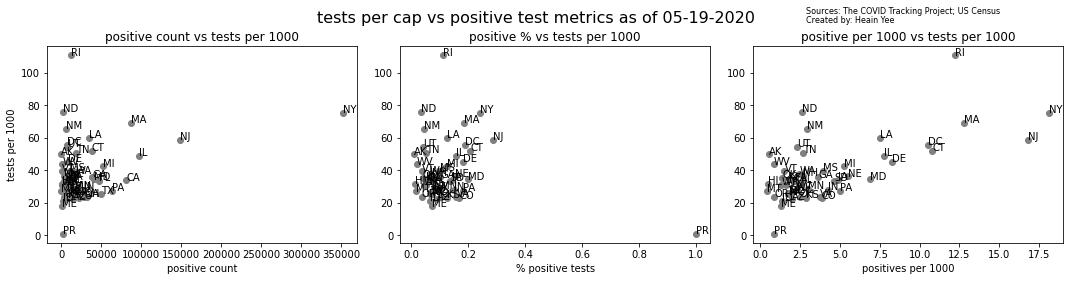

In [28]:
posperc = state_current_analysis_df['positives%']
pospercap = state_current_analysis_df['positives per 1000']
poscount = state_current_analysis_df['positive']
testspercap = state_current_analysis_df['tests per 1000']
varlabel = state_current_analysis_df['state']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
date = state_current_analysis_df['full_date'][0]
title = f"tests per cap vs positive test metrics as of {date}"
fig.suptitle(title, fontsize=16)

axes[0].set_ylabel("tests per 1000")

axes[0].set_title("positive count vs tests per 1000")
axes[0].plot(poscount, testspercap, 'o', label = varlabel, color='gray')
axes[0].set_xlabel("positive count")

axes[1].set_title("positive % vs tests per 1000")
axes[1].plot(posperc, testspercap, 'o', label = varlabel, color='gray')
axes[1].set_xlabel("% positive tests")
    
axes[2].set_title("positive per 1000 vs tests per 1000")
axes[2].plot(pospercap, testspercap, 'o', label = varlabel, color='gray')
axes[2].set_xlabel("positives per 1000")

for i, txt in enumerate(varlabel):
    axes[0].annotate(txt, (poscount[i], testspercap[i]))
    axes[1].annotate(txt, (posperc[i], testspercap[i]))
    axes[2].annotate(txt, (pospercap[i], testspercap[i]))


textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .97, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .94, textstr, fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positive_all")

plt.show()

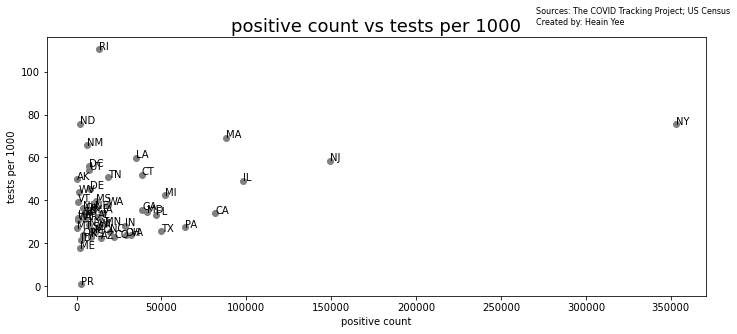

In [29]:
fig = plt.subplots(figsize=(10,5))
title = "positive count vs tests per 1000"

plt.title(title, fontsize=18)

x = state_current_analysis_df['positive']
y = state_current_analysis_df['tests per 1000']
label = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = label, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))

plt.xlabel("positive count")
plt.ylabel("tests per 1000")
    
    
textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positivecount")

plt.show()

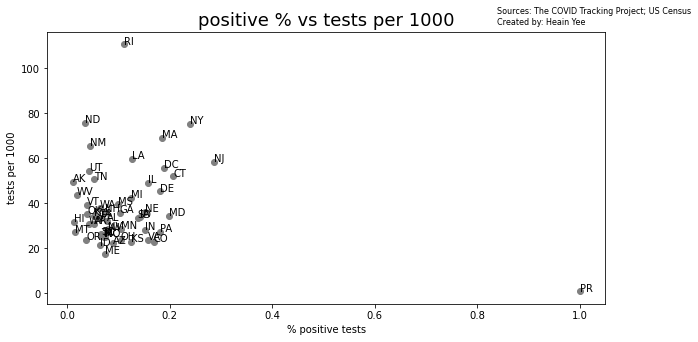

In [30]:
fig = plt.subplots(figsize=(10,5))
title = "positive % vs tests per 1000"

plt.title(title, fontsize=18)

x = state_current_analysis_df['positives%']
y = state_current_analysis_df['tests per 1000']
varlabel = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = varlabel, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))
    
plt.xlabel("% positive tests")
plt.ylabel("tests per 1000")

textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positive%")

plt.show()

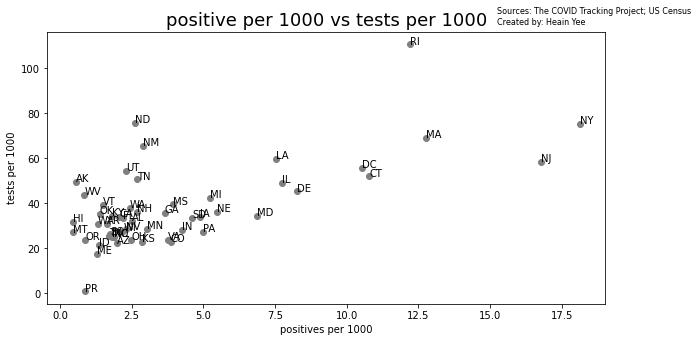

In [31]:
fig = plt.subplots(figsize=(10,5))
title = "positive per 1000 vs tests per 1000"

plt.title(title, fontsize=18)


x = state_current_analysis_df['positives per 1000']
y = state_current_analysis_df['tests per 1000']
label = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = label, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))

plt.xlabel("positives per 1000")
plt.ylabel("tests per 1000")
    
    
textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

plt.savefig("images/SC_tests-positivepercap")

plt.show()